<a href="https://colab.research.google.com/github/MukRodrigues/Projetos-Python/blob/main/Projetos-Python/tree/main/Tesla/Relat%C3%B3rio_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Variabilidade das Ações da Tesla (2010-2024)

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from scipy import stats, special
from scipy.stats import gaussian_kde
import numpy as np
import seaborn as sns

In [98]:
url = "https://raw.githubusercontent.com/MukRodrigues/Projetos-Python/refs/heads/main/Tesla/TSLA_2010_2024.csv"
data = pd.read_csv(url, sep=',')
#data.head()

## Dataset

Dataset retirado do site https://www.kaggle.com/datasets/abhimaneukj/tesla-inc-tsla-dataset?resource=download em 24/11/2025, em do site https://www.kaggle.com/datasets/iamtanmayshukla/tesla-stocks-dataset?resource=download em 09/12/2025.



**Conjunto de Dados das Ações da Tesla de 2010 a 2025.**

**Date (Data):**
Representa a data na qual a ação foi negociada no mercado financeiro.

**Open (Abertura):**
Representa o preço de abertura da ação em uma determinada data.
É o preço no qual a ação começou a ser negociada quando o mercado abriu.

**Close (Fechamento):**
Representa o preço de fechamento da ação em uma determinada data.
É a última ordem de compra e venda executada entre dois traders.
O preço de fechamento é o valor bruto, ou seja, o valor em dinheiro da última transação realizada antes do encerramento do mercado.

**High (Máxima):**
A máxima é o preço mais alto pelo qual a ação foi negociada durante um período. Aqui, o período é um dia.

**Low (Mínima):**
A mínima é o preço mais baixo pelo qual a ação foi negociada durante um período. Aqui, o período é um dia.

**Adj Close (Fechamento Ajustado):**
O preço de fechamento ajustado modifica o preço de fechamento para refletir o valor da ação após considerar ações corporativas.
Ele leva em conta eventos como desdobramentos (stock splits), dividendos e ofertas de direitos (rights offerings).

**Volume:**
Volume é o número de ações negociadas durante um determinado período.
Aqui, o ativo é a ação e o período é um dia.

In [99]:
data['Mean'] = (data['High'] + data['Low']) * 0.5
data

,Date,Open,High,Low,Close,Volume,Mean
0,2010-06-28,1.13333,1.13333,1.13333,1.13333,0,1.133330
1,2010-06-29,1.26667,1.66667,1.16933,1.59267,281749140,1.418000
2,2010-06-30,1.71933,2.02800,1.55333,1.58867,257915910,1.790665
3,2010-07-01,1.66667,1.72800,1.35133,1.46400,123447945,1.539665
4,2010-07-02,1.53333,1.54000,1.24733,1.28000,77127105,1.393665
...,...,...,...,...,...,...,...
3647,2024-12-24,435.90000,462.78000,435.14000,462.28000,59551750,448.960000
3648,2024-12-26,465.16000,465.32990,451.02000,454.13000,76651210,458.174950
3649,2024-12-27,449.52000,450.00000,426.50000,431.66000,82666821,438.250000
3650,2024-12-30,419.40000,427.00000,415.75000,417.41000,64941012,421.375000


In [100]:
cols = data.columns.tolist()
cols.insert(4,cols.pop(cols.index('Mean'))  )
data = data[cols]


In [101]:
data['Date']

,Date
0,2010-06-28
1,2010-06-29
2,2010-06-30
3,2010-07-01
4,2010-07-02
...,...
3647,2024-12-24
3648,2024-12-26
3649,2024-12-27
3650,2024-12-30


## Análise Estatística do Dataset:

### Estimadores Pontuais

#### Preço Médio

- Preço médio da ação por dia (média amostral) de 2010 a 2024;
- Variancia dos preços médios

In [102]:
data['Mean'].describe().round(3)

,Mean
count,3652.000
mean,81.498
std,107.591
min,1.054
25%,12.124
50%,17.902
75%,178.186
max,470.750


Foram feitas 3652 contabilizações do preço das ações por dia e calculados os preços médios do período de 2010-06-28	a 2024-12-31.


In [103]:
Amplitude = data['Mean'].max() - data['Mean'].min()
print('Os preços tem uma amplitude de U$',round(Amplitude,2))

Os preços tem uma amplitude de U$ 469.7


In [104]:
media = 81.498
std	= 107.591  # Ou seja, os preços das ações durante todo o período apresenta alta variabilidade (volatibilidade)
var =std**2
round(var,3)

11575.823

O preço médio (média do preço médio) foi de U\$ 81.49 por ação, com desvio padrão de U\$ 107,59 e variância de 11575.823.

#####  Gráfico da série temporal

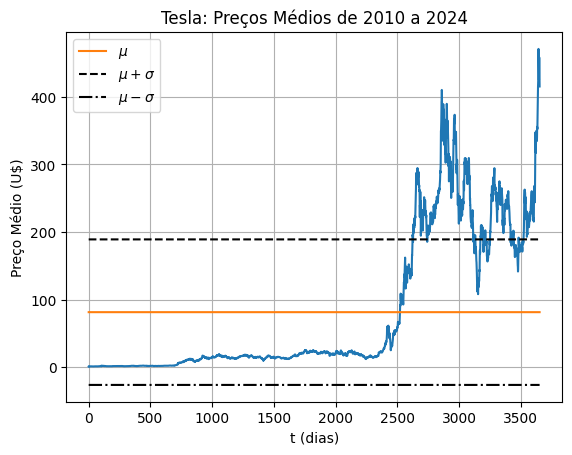

In [105]:
#Série temporal dos Preços Médios
T = np.shape(data['Mean'])[0]
t = np.linspace(0, T,T )

plt.plot(t, data['Mean'])
plt.plot(t, 0*t + media, label="$\\mu$")
plt.plot(t, 0*t + media+ std,'--', color='black', label="$\\mu + \\sigma$")
plt.plot(t, 0*t + media - std,'-.', color='black', label="$\\mu - \\sigma$")
plt.title('Tesla: Preços Médios de 2010 a 2024')

plt.xlabel('t (dias)')
plt.ylabel('Preço Médio (U$)')
plt.legend()

plt.grid()
plt.show()


- Quantos preços estão no intervalo $[\mu - \sigma, \mu + \sigma]$ ?

In [106]:
contagem = 0
for i in range( len(data['Mean'])):
  if  media - std <=   data['Mean'][i] <= media + std:
    contagem = contagem + 1
print('Têm',contagem,'valores dentro desse intervalo.')

Têm 2809 valores dentro desse intervalo.


#### Volume de Negociação

- Volume médio de negociação por dia (média amostral) de 2010 a 2024;
- Variancia dos volumes

In [107]:
data['Volume'].describe().round(1)

,Volume
count,3652.0
mean,96156979.0
std,77898564.9
min,0.0
25%,47150591.2
50%,81543667.0
75%,121935315.0
max,914081370.0


In [108]:
Amplitude2 = data['Volume'].max() - data['Volume'].min()
print('Os volumes negociados tem uma amplitude de',round(Amplitude2,2),'ações por dia.')

Os volumes negociados tem uma amplitude de 914081370 ações por dia.


In [109]:
media2 = 9.615698e+07
std2	= 7.789856e+07  # Ou seja, os preços das ações durante todo o período apresenta alta variabilidade (volatibilidade)
var2 =std2**2
round(var2,2)

6068185650073600.0

Foram negociados em média 96156979 ações por dia.

#####  Gráfico da série temporal

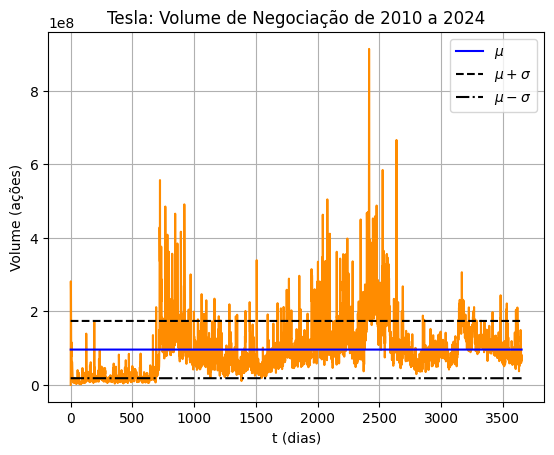

In [110]:
#Série temporal dos Volumes
T = np.shape(data['Volume'])[0]
t = np.linspace(0, T,T )

plt.plot(t, data['Volume'], color='darkorange')
plt.plot(t, 0*t + media2, color='blue', label="$\\mu$")
plt.plot(t, 0*t + media2+ std2,'--', color='black', label="$\\mu + \\sigma$")
plt.plot(t, 0*t + media2 - std2,'-.', color='black', label="$\\mu - \\sigma$")
plt.title('Tesla: Volume de Negociação de 2010 a 2024')

#plt.ylim(0, 5.5e8)
plt.xlabel('t (dias)')
plt.ylabel('Volume (ações)')
plt.legend()

plt.grid()
plt.show()


#### Rendimento das ações

In [111]:
rentability = []
for i in range(len(t)-1):
  v = (data['Mean'][i+1]-data['Mean'][i])/data['Mean'][i]
  rentability.append(v)

rentability.insert(0,0)
len(rentability)

3652

In [112]:
data['Rentability'] = rentability
data['Cumulative Rent.'] = data['Rentability'].cumsum()
data.head()

/tmp/ipython-input-3657103709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Rentability'] = rentability
/tmp/ipython-input-3657103709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cumulative Rent.'] = data['Rentability'].cumsum()


,Date,Open,High,Low,Mean,Close,Volume,Rentability,Cumulative Rent.
0,2010-06-28,1.13333,1.13333,1.13333,1.133330,1.13333,0,0.000000,0.000000
1,2010-06-29,1.26667,1.66667,1.16933,1.418000,1.59267,281749140,0.251180,0.251180
2,2010-06-30,1.71933,2.02800,1.55333,1.790665,1.58867,257915910,0.262810,0.513990
3,2010-07-01,1.66667,1.72800,1.35133,1.539665,1.46400,123447945,-0.140171,0.373819
4,2010-07-02,1.53333,1.54000,1.24733,1.393665,1.28000,77127105,-0.094826,0.278993


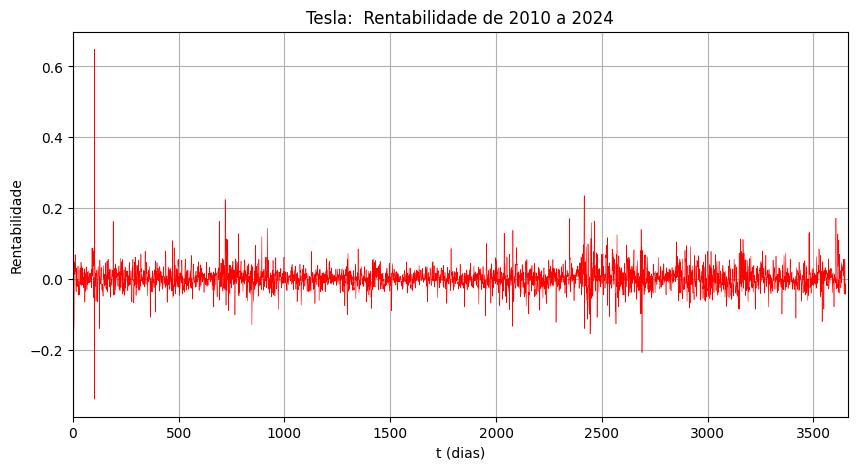

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(t, data['Rentability'], linewidth=0.4,
         color='red')
#plt.plot(t, 0*t + media, label="$\\mu$")
plt.title('Tesla:  Rentabilidade de 2010 a 2024')

plt.xlabel('t (dias)')
plt.ylabel('Rentabilidade')
plt.xlim(0,len(t) +10)
#plt.legend()

plt.grid()
plt.show()

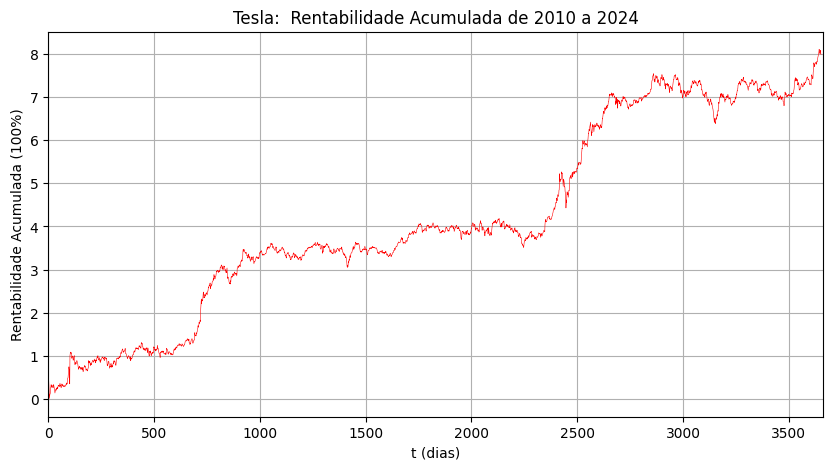

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(t, data['Cumulative Rent.'], linewidth=0.4,
         color='red')
#plt.plot(t, 0*t + media, label="$\\mu$")
plt.title('Tesla:  Rentabilidade Acumulada de 2010 a 2024')

plt.xlabel('t (dias)')
plt.ylabel('Rentabilidade Acumulada (100%)')
plt.xlim(0,len(t) +10)
#plt.legend()

plt.grid()
plt.show()

### Correlações Entre as Variáveis

#### Volume de Negociações $\times$ Preço Médio



Nesse gráfico, cada um dos pontos é dado pela relação 1 pra 1 entre os valores das séries temporais do volume de negociação e do preço diário médio das ações da Tesla. Esse tipo de gráfico mostra as relações complexas entre essas duas variáveis.

Nelo podemos notar que o volume de negociação diminui à medida que o preço médio das ações aumenta. O maior volume de negociação fica na casa dos 900 milhões no período onde a ação da Tesla estava cerca de U$60.

"APARENTEMENTE VOLUME E PREÇO MÉDIO APRESENTAM CORRELAÇÃO NEGATIVA", ou seja, enquanto o preço aumenta o volume diminui.. isso pode ser um indicador de crescimento de patrimônio, pois um investidor hipotético que fez um aporte inicial de 100 cotas a U\$ 1 dólar ao final de 2024 teria cerca de U\$ 40.000. Porém, o Coeficiente de Pearson (r=0.098) entre as duas séries indica que não há correlação (ou que é praticamente desprezível) entre volume e preço.

<Figure size 1000x500 with 0 Axes>

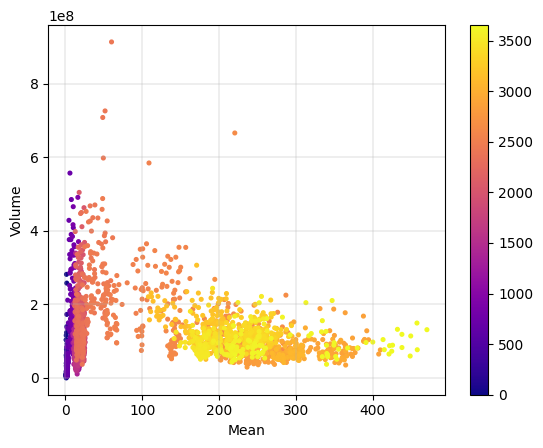

In [115]:
X = 'Mean'
Y = 'Volume'
c = 'Close'
t_unit = 1/len(t) * t

plt.figure(figsize=(10, 5))

data.plot.scatter(X, Y, s=7, c=t, colormap='plasma')
plt.grid(linewidth=0.3)
plt.show()

In [116]:
max(data['Volume'])

914081370

In [117]:
for i in range(len(t)):
  if data['Volume'][i] == max(data['Volume']):
    print(i)

2416


In [118]:
data['Date'][2416]

'2020-02-04'

In [119]:
data['Mean'][2416]

np.float64(60.09665)

In [120]:
# coeficiente de Pearson
pearson_coef, p_value = stats.pearsonr(data['Volume'], data['Mean'])
[pearson_coef.round(5), p_value.round(5)]

[np.float64(0.0981), np.float64(0.0)]

#### Preço de Fechamento $\times$ Preço Médio



Nesse gráfico, cada um dos pontos é dado pela relação 1 pra 1 entre os valores das séries temporais do preço de fechamento e do preço diário médio das ações da Tesla.  

Nele que as duas séries temporais apresentam forte correlação (r=0,99), justificando o uso da série dos preços diários médios para analisar a valorização (ou desvalorização) dessas ações.

O gráfico representa os valores das duas séries analisadas em função do tempo (gráfico em barra), onde os pontos azulados representam os dias iniciais (em 2010) em que as ações foram contabilizadas e os pontos amarelados, os dias finais (em 2024).

<Figure size 1000x500 with 0 Axes>

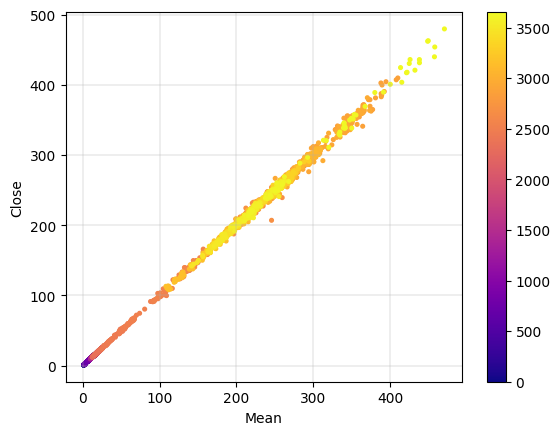

In [121]:
X = 'Mean'
Y = 'Close'

plt.figure(figsize=(10, 5))
data.plot.scatter(X, Y, s=7, c=t, colormap='plasma')
plt.grid(linewidth=0.3)
plt.show()

In [122]:
# coeficiente de Pearson
pearson_coef, p_value = stats.pearsonr(data['Close'], data['Mean'])
[pearson_coef.round(5), p_value.round(5)]

[np.float64(0.99973), np.float64(0.0)]

### Estimadores Não-Paramétricos

- Função de distribuição acumulada empírica (eCDF);
- Histograma;
- Kernel da distribuição de densidade

#### Distribuição Acumulada Empírica (Preços Médios e Volume Neg.)

In [123]:
mean_sort = data['Mean']
mean_sort = mean_sort.sort_values()

volume_sort = data['Volume']
volume_sort = volume_sort.sort_values()

In [124]:
# soma dos preços médios ordenados
mean_sort_cumsum = mean_sort.cumsum()
volume_sort_cumsum = volume_sort.cumsum()
mean_sort_cumsum.head()

,Mean
6,1.053669
7,2.156669
0,3.289999
8,4.438329
9,5.607329


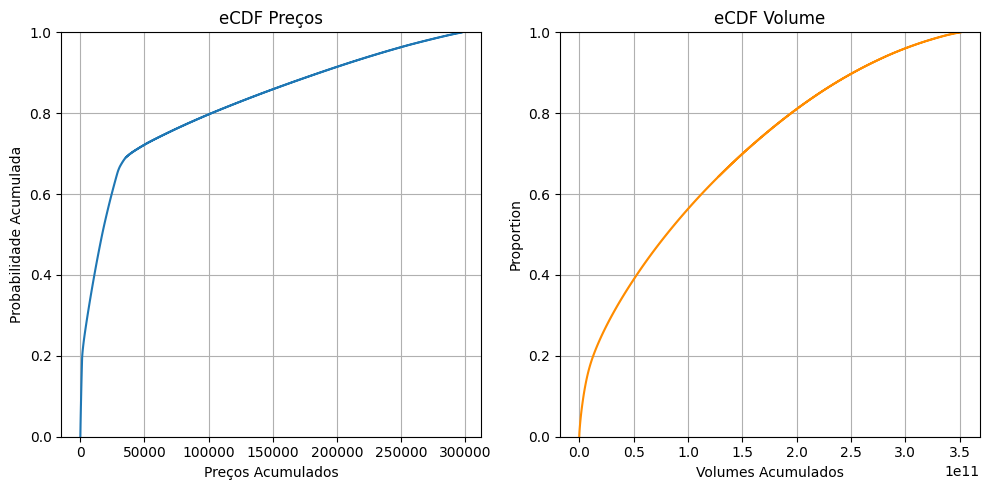

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1 row, 2 columns

sns.ecdfplot(data=mean_sort_cumsum, label='eCDF Preços', ax=axes[0])
axes[0].set_title('eCDF Preços')
axes[0].set_xlabel('Preços Acumulados')
axes[0].set_ylabel('Probabilidade Acumulada')
axes[0].grid(True)

sns.ecdfplot(data=volume_sort_cumsum, color='darkorange', label='eCDF Volume', ax=axes[1])
axes[1].set_title('eCDF Volume')
axes[1].set_xlabel('Volumes Acumulados')


plt.grid()
plt.tight_layout()
plt.show()


#### Histograma e Kde

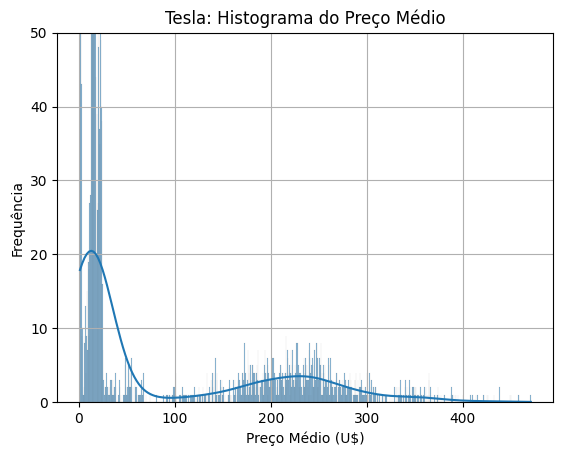

In [162]:
sns.histplot(data['Mean'], bins=1000 , kde=True)

plt.title('Tesla: Histograma do Preço Médio')
plt.xlabel('Preço Médio (U$)')
plt.ylabel('Frequência')

plt.ylim(0,50)
plt.grid()
#data['Mean'].plot.kde()
plt.show()

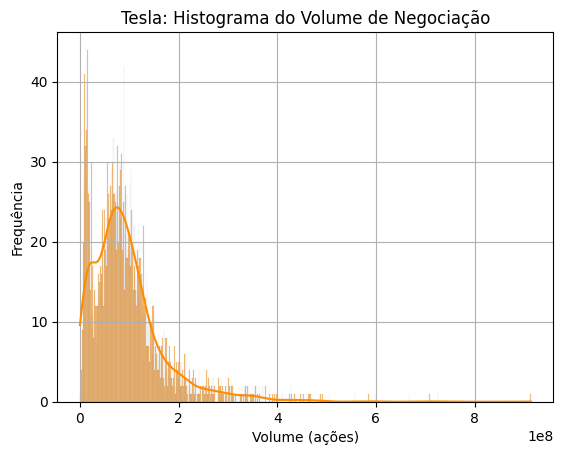

In [127]:

sns.histplot(data['Volume'], bins=1000 , color='darkorange', kde=True)

plt.title('Tesla: Histograma do Volume de Negociação')
plt.xlabel('Volume (ações)')
plt.ylabel('Frequência')

plt.grid()
#data['Mean'].plot.kde()
plt.show()

## Estatística Não Extensiva - Preço Médio

#### Estimativa da q-média e da q-variância

In [128]:
def q_moments_kde_series(series, q=1.0, bandwidth_method='scott', leave_one_out=False):
    """
    Calcula q-media e q-variancia para uma pandas Series usando KDE.
    series: pd.Series contendo os valores (por exemplo data['Mean'])
    q: parâmetro q (float)
    """
    # converte a Series para numpy array
    x = np.asarray(series.dropna()).astype(float)
    N = x.size

    if N < 5:
        raise ValueError("A série precisa ter mais do que 5 observações.")

    # KDE usual ou leave-one-out
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
    if not leave_one_out:
        kde = gaussian_kde(x, bw_method=bandwidth_method)
        p_hat = kde.evaluate(x)
    else:
        p_hat = np.empty(N, dtype=float)
        for i in range(N):
            xi = np.delete(x, i)
            kde_i = gaussian_kde(xi, bw_method=bandwidth_method)
            p_hat[i] = kde_i.evaluate(x[i])[0]

    # evita zeros, pois está considerando todos os valores do dataset
    # como tendo alguma probabilidade não nula de ocorrência,
    # tendo em vista que xi ocorreu em algum período de 2010 a 2024
    eps = 1e-300
    p_hat = np.maximum(p_hat, eps)

    # escort weights
    w = p_hat**q / np.sum( p_hat**q)

    q_mean = np.sum(w * x)
    q_var = np.sum(w * (x - q_mean)**2)

    return q_mean, q_var, w, p_hat

x = data['Mean']
q = 1
#OBS.: para q=0 recupera-se as estimativas pontuais anteriores (media = 81... e desvio padrao = 107...)

q_mean, q_var, w, p_hat = q_moments_kde_series(x, q=q)

print("q-mean =", q_mean)
print("q-variance =", q_var)
print("q-desvio =", np.sqrt(q_var))


q-mean = 24.402709944157717
q-variance = 2472.587269988358
q-desvio = 49.725117093762165


#### Estimativa da q-KDE

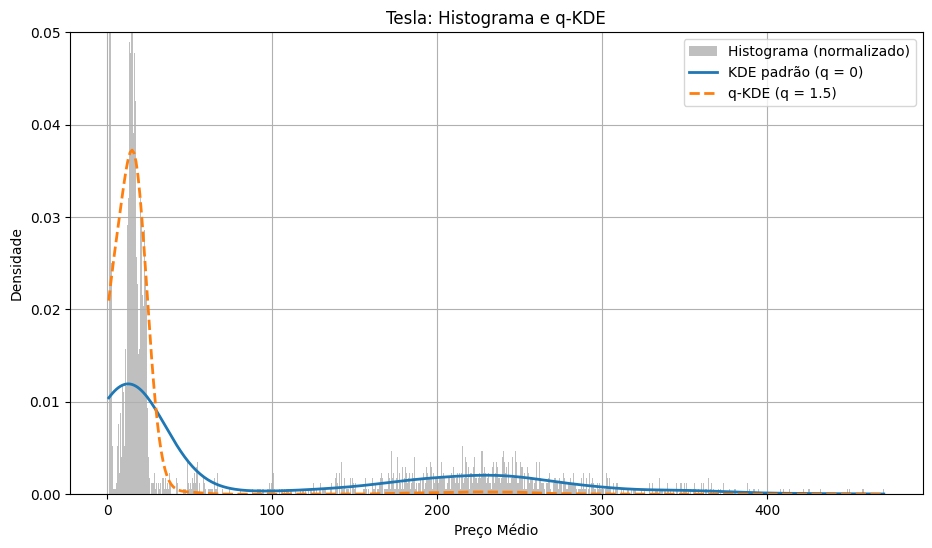

In [129]:
def plot_q_kde_and_escort(series, q=1, bandwidth_method='scott',
                          bins=1000, hist_alpha=0.5):
    """
    Plota:
    - Histograma dos dados
    - KDE padrão
    - q-KDE
    """
    # converte série para numpy
    x = np.asarray(series.dropna()).astype(float)

    # KDE padrão
    kde = gaussian_kde(x, bw_method=bandwidth_method)

    # grade para plotagem
    xs = np.linspace(np.min(x), np.max(x), 400)
    p = kde(xs)

    # densidade nos pontos observados
    p_hat = kde.evaluate(x)
    p_hat = np.maximum(p_hat, 1e-300)

    # pesos escort
    w_raw = p_hat**q
    w = w_raw / np.sum(w_raw)

    # KDE escort (utiliza os pesos)
    kde_escort = gaussian_kde(x, weights=w, bw_method=bandwidth_method)
    p_escort = kde_escort(xs)

    # ---------- PLOTAGEM ----------
    plt.figure(figsize=(11, 6))

    # Histograma
    plt.hist(x, bins=bins, density=True, color='gray',
             alpha=hist_alpha, label='Histograma (normalizado)')

    # KDE padrão
    plt.plot(xs, p, label='KDE padrão (q = 0)', linewidth=2)

    # KDE escort
    plt.plot(xs, p_escort,'--', label=f'q-KDE (q = {q})', linewidth=2)


    plt.title('Tesla: Histograma e q-KDE')
    plt.xlabel('Preço Médio')
    plt.ylabel('Densidade')
    plt.ylim(0,0.05)
    plt.grid(True)
    plt.legend()
    plt.show()

x = data['Mean']
q = 1.5
plot_q_kde_and_escort(x, q)

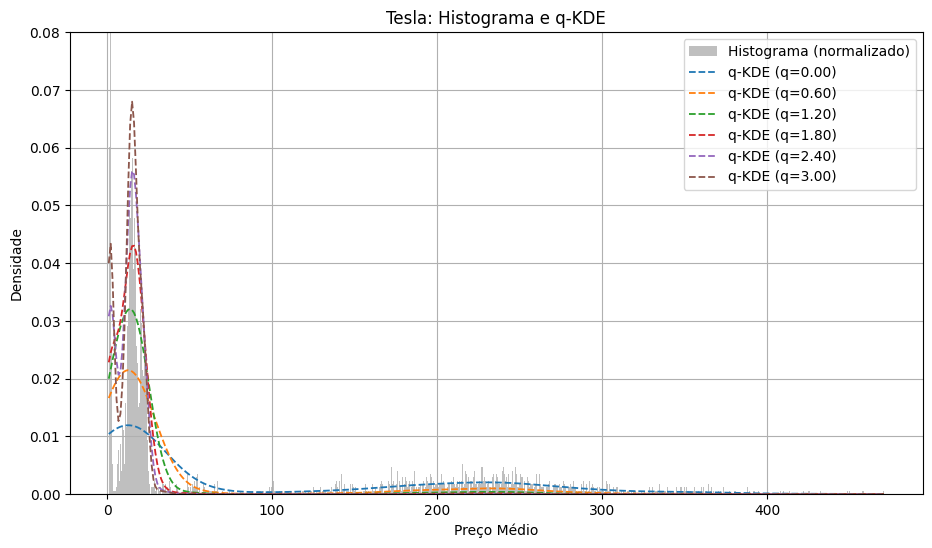

In [130]:
# vetor de valores q
q_values = np.linspace(0, 3, 6)

plt.figure(figsize=(11, 6))

# histograma base
x = np.asarray(data['Mean'].dropna()).astype(float)
plt.hist(x, bins=1000, density=True, color='gray', alpha=0.50, label='Histograma (normalizado)')

# gera todas as curvas para cada q
xs = np.linspace(np.min(x), np.max(x), 400)
kde = gaussian_kde(x)
p = kde(xs)
#plt.plot(xs, p, color='black', linewidth=2, label='KDE padrão (q = 1)')

# curvas escort-q
for q in q_values:
    p_hat = kde.evaluate(x)
    p_hat = np.maximum(p_hat, 1e-300)
    w_raw = p_hat**q
    w = w_raw / np.sum(w_raw)
    kde_escort = gaussian_kde(x, weights=w)
    p_escort = kde_escort(xs)

    plt.plot(xs, p_escort,'--',
             linewidth=1.3, label=f'q-KDE (q={q:.2f})')



plt.title('Tesla: Histograma e q-KDE')
plt.xlabel('Preço Médio')
plt.ylabel('Densidade')
plt.ylim(0,0.08)
#plt.xlim(0,50)
plt.grid(True)
plt.legend()
plt.show()


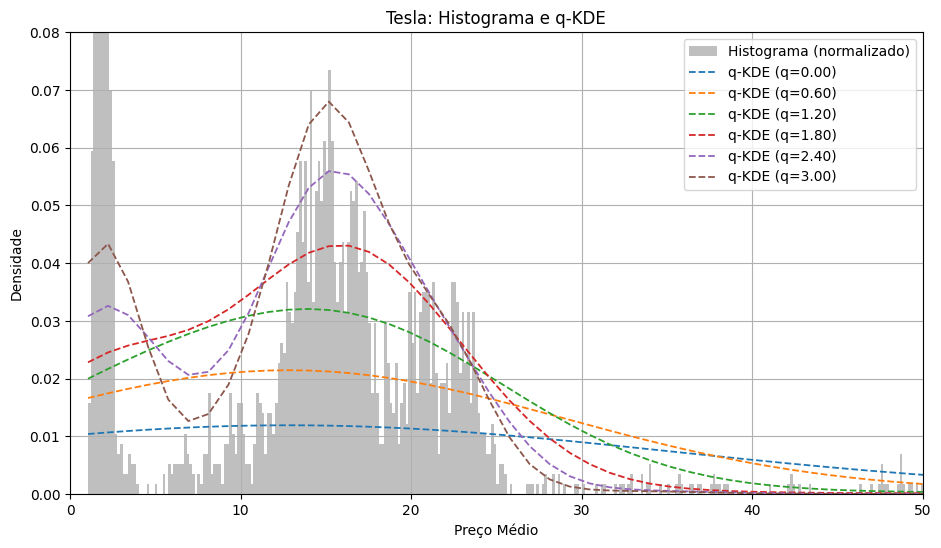

In [131]:
# vetor de valores q
q_values = np.linspace(0, 3, 6)

plt.figure(figsize=(11, 6))

# histograma base
x = np.asarray(data['Mean'].dropna()).astype(float)
plt.hist(x, bins=3000, density=True, color='gray', alpha=0.50, label='Histograma (normalizado)')

# gera todas as curvas para cada q
xs = np.linspace(np.min(x), np.max(x), 400)
kde = gaussian_kde(x)
p = kde(xs)
#plt.plot(xs, p, linewidth=2, label='KDE padrão (q = 1)')

# curvas escort-q
for q in q_values:
    p_hat = kde.evaluate(x)
    p_hat = np.maximum(p_hat, 1e-300)
    w_raw = p_hat**q
    w = w_raw / np.sum(w_raw)
    kde_escort = gaussian_kde(x, weights=w)
    p_escort = kde_escort(xs)
    plt.plot(xs, p_escort,'--',
             linewidth=1.3, label=f'q-KDE (q={q:.2f})')


plt.title('Tesla: Histograma e q-KDE')
plt.xlabel('Preço Médio')
plt.ylabel('Densidade')
plt.ylim(0,0.08)
plt.xlim(0,50)
plt.grid(True)
plt.legend()
plt.show()


### Estimativa da Máxima Verossimilhança

In [141]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.stats import gaussian_kde

def q_gaussian_kernel(x, mu, beta, q):
    """O núcleo (não normalizado) da q-gaussiana em x."""
    arg = 1.0 - (1.0 - q) * beta * (x - mu)**2
    # proteger contra valores não positivos
    return np.where(arg > 0, arg**(1.0/(1.0 - q)), 0.0)

def Z_numeric(mu, beta, q):
    """Calcula Z(mu,beta,q) por integração numérica dependendo de q."""
    if q < 1.0:
        # suporte finito: |x-mu| < R
        R = 1.0 / np.sqrt((1.0 - q) * beta)
        integrand = lambda t: q_gaussian_kernel(t, mu, beta, q)
        val, err = quad(integrand, mu - R, mu + R, limit=200)
        return val
    else:
        # q >= 1: integrar de -inf a +inf (caudas)
        integrand = lambda t: q_gaussian_kernel(t, mu, beta, q)
        val, err = quad(integrand, -np.inf, np.inf, limit=500)
        return val

def neg_loglik(params, x, q):
    """
    params: array [mu, log_beta]
    x: dados (1D numpy array)
    q: valor q fixo
    """
    mu, log_beta = params
    beta = np.exp(log_beta)  # garante beta>0

    # verificar validade dos argumentos (se q<1, todos os pontos devem estar no suporte)
    if q < 1.0:
        R = 1.0 / np.sqrt((1.0 - q) * beta)
        if (x.min() < mu - R) or (x.max() > mu + R):
            return 1e12  # penaliza configurações inválidas (fora do suporte)

    # calcula Z (pode ser caro)
    Z = Z_numeric(mu, beta, q)
    if Z <= 0 or not np.isfinite(Z):
        return 1e12

    arg = 1.0 - (1.0 - q) * beta * (x - mu)**2
    if np.any(arg <= 0):
        # caso numérico de negatividade; penalize fortemente
        return 1e12

    sum_log = np.sum(np.log(arg))
    n = x.size
    loglik = - n * np.log(Z) + (1.0 / (1.0 - q)) * sum_log
    return -loglik  # minimizamos negativo

def mle_q_gauss(x_series, q, mu0=None, beta0=None):
    x = np.asarray(x_series.dropna()).astype(float)

    # inicializações razoáveis:
    if mu0 is None:
        mu0 = np.mean(x)           # média clássica (ou use q-mean)
    if beta0 is None:
        s = np.var(x, ddof=0)
        # aproximação inicial: para q=1, beta ~ 1/(2*var); usar como chute razoável
        beta0 = 1.0 / (2.0 * (s + 1e-8))

    init = np.array([mu0, np.log(beta0)])

    # bounds: mu free, log_beta livre (beta>0 enforced by exp)
    res = minimize(neg_loglik, init, args=(x, q),
                   method='L-BFGS-B',
                   options={'maxiter':1000, 'ftol':1e-9})

    if not res.success:
        print("Atenção: otimização não convergiu:", res.message)

    mu_hat, log_beta_hat = res.x
    beta_hat = np.exp(log_beta_hat)
    negloglik = res.fun

    return {'mu': mu_hat, 'beta': beta_hat, 'neg_loglik': negloglik, 'success': res.success, 'message': res.message}


In [145]:
# suponha que data['Mean'] exista
xseries = data['Mean']

# escolher q (fixo) — por exemplo q = 1.2
q = 2.9

res = mle_q_gauss(xseries, q)
print(res)


{'mu': np.float64(15.046637744543785), 'beta': np.float64(5.5551105905584945), 'neg_loglik': np.float64(23913.07044208804), 'success': True, 'message': 'CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH'}


### Estimativa de "q"

In [207]:
def profile_loglik_q(x_series, q_grid):
    """
    Calcula a log-verossimilhança perfilada em função de q.

    Retorna:
    q_vals  : array de valores de q
    logliks : array da log-verossimilhança máxima para cada q
    params  : lista de dicionários com mu e beta estimados
    """
    x = np.asarray(x_series.dropna()).astype(float)

    logliks = []
    params = []

    for q in q_grid:
        # evitar singularidade exata em q=1
        if np.isclose(q, 1.0):
            q_eff = 1.0 + 1e-6
        else:
            q_eff = q

        try:
            res = mle_q_gauss(x_series, q_eff)

            if res['success']:
                logliks.append(-res['neg_loglik'])
                params.append({'q': q_eff,
                               'mu': res['mu'],
                               'beta': res['beta']})
            else:
                logliks.append(np.nan)
                params.append(None)

        except Exception:
            logliks.append(np.nan)
            params.append(None)

    return np.array(q_grid), np.array(logliks), params


In [208]:
q_grid = np.linspace(0.01, 3.0, 60)


In [209]:
q_vals, loglik_vals, mle_params = profile_loglik_q(data['Mean'], q_grid)


/tmp/ipython-input-1623694504.py:23: IntegrationWarning: The maximum number of subdivisions (500) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val, err = quad(integrand, -np.inf, np.inf, limit=500)


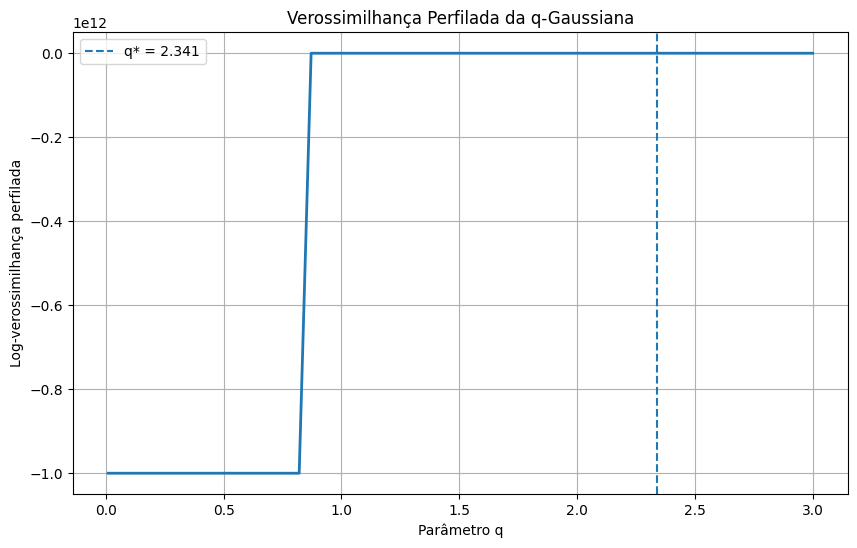

In [210]:
plt.figure(figsize=(10, 6))
plt.plot(q_vals, loglik_vals, linewidth=2)
plt.xlabel('Parâmetro q')
plt.ylabel('Log-verossimilhança perfilada')
plt.title('Verossimilhança Perfilada da q-Gaussiana')
plt.grid(True)

# marcar o máximo
q_hat = q_vals[np.nanargmax(loglik_vals)]
ll_max = np.nanmax(loglik_vals)
plt.axvline(q_hat, linestyle='--', label=f'q* = {q_hat:.3f}')
plt.legend()

plt.show()


#### q-Gaussiana ajustada

In [213]:
idx_max = np.argmax(loglik_vals)
q_star = q_vals[idx_max]

best_params = mle_params[idx_max]

q_star = best_params['q']
mu_star = best_params['mu']
beta_star = best_params['beta']

print(f"Estimativa MLE:")
print(f"q   = {q_star:.4f}")
print(f"mu  = {mu_star:.6f}")
print(f"beta= {beta_star:.6e}")


Estimativa MLE:
q   = 2.3412
mu  = 15.000356
beta= 3.576397e-02


In [214]:
def q_gaussian_pdf(xs, mu, beta, q):
    xs = np.asarray(xs)

    # termo interno
    arg = 1 - (1 - q) * beta * (xs - mu)**2

    # zera fora do suporte (necessário para q < 1)
    arg = np.maximum(arg, 0.0)

    # parte não normalizada
    power = 1.0 / (1.0 - q)
    f_unnorm = arg**power

    # constante de normalização
    Z = Z_numeric(mu, beta, q)
    if Z <= 0 or not np.isfinite(Z):
        return np.zeros_like(xs)

    Aq = 1.0 / Z
    return Aq * f_unnorm


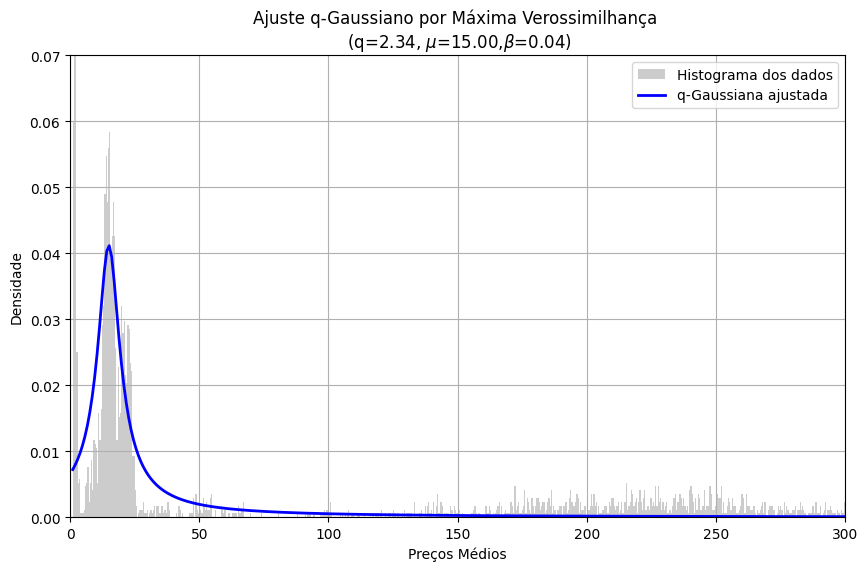

In [219]:
x_data = data['Mean']  #returns.values
xs = np.linspace(x_data.min(), x_data.max(), 500)

pdf_q = q_gaussian_pdf(xs, mu_star, beta_star, q_star)

plt.figure(figsize=(10, 6))

plt.hist(x_data, bins=1000, density=True,
         alpha=0.4, color='gray', label='Histograma dos dados')

plt.plot(xs, pdf_q, 'blue', lw=2,
         label='q-Gaussiana ajustada')

plt.xlabel('Preços Médios')
plt.ylabel('Densidade')
plt.title(f'Ajuste q-Gaussiano por Máxima Verossimilhança \n (q={q_star:.2f}, $\\mu$={mu_star:.2f},$\\beta$={beta_star:.2f}) ')
plt.ylim(0,0.07)
plt.xlim(0,300)
plt.grid(True)
plt.legend()
plt.show()


## Estatística Não Extensiva - Rentabilidade

#### Estimativa da q-média e da q-variância

In [163]:
returns = np.log(data['Mean']).diff().dropna()

In [164]:
def q_moments_kde_series(series, q=1.0, bandwidth_method='scott', leave_one_out=False):
    """
    Calcula q-media e q-variancia para uma pandas Series usando KDE.
    series: pd.Series contendo os valores (por exemplo data['Mean'])
    q: parâmetro q (float)
    """
    # converte a Series para numpy array
    x = np.asarray(series.dropna()).astype(float)
    N = x.size

    if N < 5:
        raise ValueError("A série precisa ter mais do que 5 observações.")

    # KDE usual ou leave-one-out
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
    if not leave_one_out:
        kde = gaussian_kde(x, bw_method=bandwidth_method)
        p_hat = kde.evaluate(x)
    else:
        p_hat = np.empty(N, dtype=float)
        for i in range(N):
            xi = np.delete(x, i)
            kde_i = gaussian_kde(xi, bw_method=bandwidth_method)
            p_hat[i] = kde_i.evaluate(x[i])[0]

    # evita zeros, pois está considerando todos os valores do dataset
    # como tendo alguma probabilidade não nula de ocorrência,
    # tendo em vista que xi ocorreu em algum período de 2010 a 2024
    eps = 1e-300
    p_hat = np.maximum(p_hat, eps)

    # escort weights
    w = p_hat**q / np.sum( p_hat**q)

    q_mean = np.sum(w * x)
    q_var = np.sum(w * (x - q_mean)**2)

    return q_mean, q_var, w, p_hat

x = returns
q = 1
#OBS.: para q=0 recupera-se as estimativas pontuais anteriores (media = 81... e desvio padrao = 107...)

q_mean, q_var, w, p_hat = q_moments_kde_series(x, q=q)

print("q-mean =", q_mean)
print("q-variance =", q_var)
print("q-desvio =", np.sqrt(q_var))


q-mean = 0.0015542799495085577
q-variance = 0.00027638136801828606
q-desvio = 0.016624721592203764


#### Estimativa da q-KDE

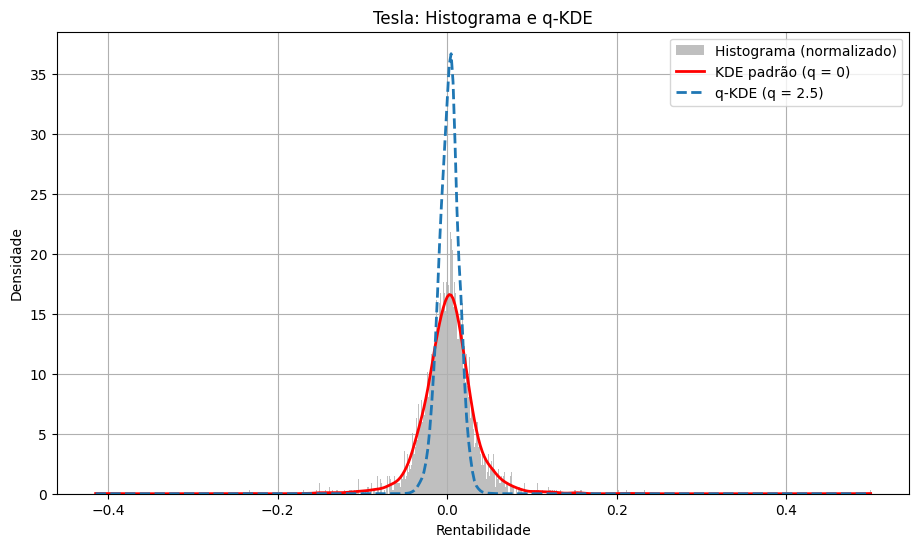

In [220]:
def plot_q_kde_and_escort(series, q=1, bandwidth_method='scott',
                          bins=1000, hist_alpha=0.5):
    """
    Plota:
    - Histograma dos dados
    - KDE padrão
    - q-KDE
    """
    # converte série para numpy
    x = np.asarray(series.dropna()).astype(float)

    # KDE padrão
    kde = gaussian_kde(x, bw_method=bandwidth_method)

    # grade para plotagem
    xs = np.linspace(np.min(x), np.max(x), 400)
    p = kde(xs)

    # densidade nos pontos observados
    p_hat = kde.evaluate(x)
    p_hat = np.maximum(p_hat, 1e-300)

    # pesos escort
    w_raw = p_hat**q
    w = w_raw / np.sum(w_raw)

    # KDE escort (utiliza os pesos)
    kde_escort = gaussian_kde(x, weights=w, bw_method=bandwidth_method)
    p_escort = kde_escort(xs)

    # ---------- PLOTAGEM ----------
    plt.figure(figsize=(11, 6))

    # Histograma
    plt.hist(x, bins=bins, density=True, color='gray',
             alpha=hist_alpha, label='Histograma (normalizado)')

    # KDE padrão
    plt.plot(xs, p,'r-', label='KDE padrão (q = 0)', linewidth=2)

    # KDE escort
    plt.plot(xs, p_escort,'--', label=f'q-KDE (q = {q})', linewidth=2)


    plt.title('Tesla: Histograma e q-KDE')
    plt.xlabel('Rentabilidade')
    plt.ylabel('Densidade')
    #plt.ylim(0,0.05)
    plt.grid(True)
    plt.legend()
    plt.show()

x = returns
q = 2.5
plot_q_kde_and_escort(x, q)

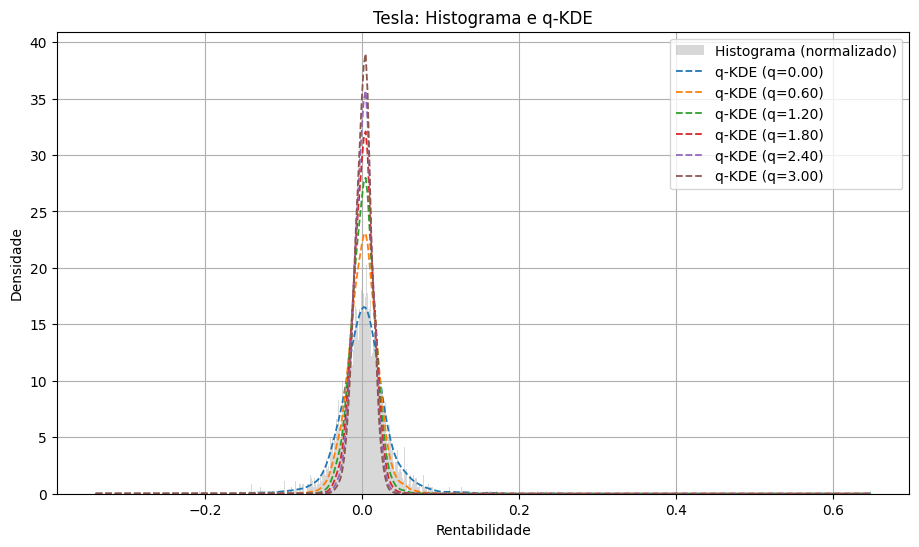

In [172]:
# vetor de valores q
q_values = np.linspace(0, 3, 6)

plt.figure(figsize=(11, 6))

# histograma base
x = np.asarray(data['Rentability'].dropna()).astype(float)
plt.hist(x, bins=1000, density=True, color='gray', alpha=0.30, label='Histograma (normalizado)')

# gera todas as curvas para cada q
xs = np.linspace(np.min(x), np.max(x), 400)
kde = gaussian_kde(x)
p = kde(xs)
#plt.plot(xs, p, color='black', linewidth=2, label='KDE padrão (q = 1)')

# curvas escort-q
for q in q_values:
    p_hat = kde.evaluate(x)
    p_hat = np.maximum(p_hat, 1e-300)
    w_raw = p_hat**q
    w = w_raw / np.sum(w_raw)
    kde_escort = gaussian_kde(x, weights=w)
    p_escort = kde_escort(xs)

    plt.plot(xs, p_escort,'--',
             linewidth=1.3, label=f'q-KDE (q={q:.2f})')



plt.title('Tesla: Histograma e q-KDE')
plt.xlabel('Rentabilidade')
plt.ylabel('Densidade')
#plt.ylim(0,0.08)
#plt.xlim(0,50)
plt.grid(True)
plt.legend()
plt.show()


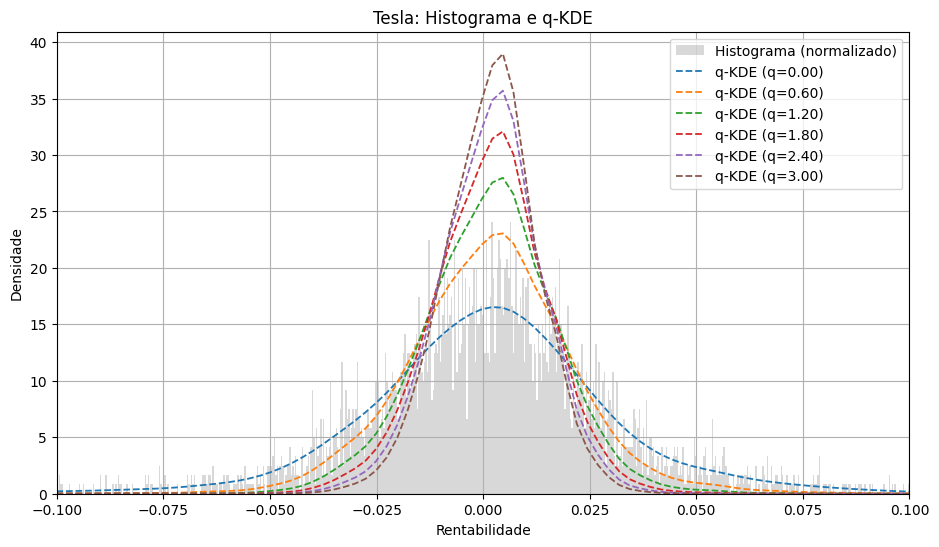

In [175]:
# vetor de valores q
q_values = np.linspace(0, 3, 6)

plt.figure(figsize=(11, 6))

# histograma base
x = np.asarray(data['Rentability'].dropna()).astype(float)
plt.hist(x, bins=3000, density=True, color='gray', alpha=0.3, label='Histograma (normalizado)')

# gera todas as curvas para cada q
xs = np.linspace(np.min(x), np.max(x), 400)
kde = gaussian_kde(x)
p = kde(xs)
#plt.plot(xs, p, linewidth=2, label='KDE padrão (q = 1)')

# curvas escort-q
for q in q_values:
    p_hat = kde.evaluate(x)
    p_hat = np.maximum(p_hat, 1e-300)
    w_raw = p_hat**q
    w = w_raw / np.sum(w_raw)
    kde_escort = gaussian_kde(x, weights=w)
    p_escort = kde_escort(xs)
    plt.plot(xs, p_escort,'--',
             linewidth=1.3, label=f'q-KDE (q={q:.2f})')


plt.title('Tesla: Histograma e q-KDE')
plt.xlabel('Rentabilidade')
plt.ylabel('Densidade')
#plt.ylim(0,0.08)
plt.xlim(-0.1,0.1)
plt.grid(True)
plt.legend()
plt.show()


### Estimativa da Máxima Verossimilhança

In [176]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from scipy.stats import gaussian_kde

def q_gaussian_kernel(x, mu, beta, q):
    """O núcleo (não normalizado) da q-gaussiana em x."""
    arg = 1.0 - (1.0 - q) * beta * (x - mu)**2
    # proteger contra valores não positivos
    return np.where(arg > 0, arg**(1.0/(1.0 - q)), 0.0)

def Z_numeric(mu, beta, q):
    """Calcula Z(mu,beta,q) por integração numérica dependendo de q."""
    if q < 1.0:
        # suporte finito: |x-mu| < R
        R = 1.0 / np.sqrt((1.0 - q) * beta)
        integrand = lambda t: q_gaussian_kernel(t, mu, beta, q)
        val, err = quad(integrand, mu - R, mu + R, limit=200)
        return val
    else:
        # q >= 1: integrar de -inf a +inf (caudas)
        integrand = lambda t: q_gaussian_kernel(t, mu, beta, q)
        val, err = quad(integrand, -np.inf, np.inf, limit=500)
        return val

def neg_loglik(params, x, q):
    """
    params: array [mu, log_beta]
    x: dados (1D numpy array)
    q: valor q fixo
    """
    mu, log_beta = params
    beta = np.exp(log_beta)  # garante beta>0

    # verificar validade dos argumentos (se q<1, todos os pontos devem estar no suporte)
    if q < 1.0:
        R = 1.0 / np.sqrt((1.0 - q) * beta)
        if (x.min() < mu - R) or (x.max() > mu + R):
            return 1e12  # penaliza configurações inválidas (fora do suporte)

    # calcula Z (pode ser caro)
    Z = Z_numeric(mu, beta, q)
    if Z <= 0 or not np.isfinite(Z):
        return 1e12

    arg = 1.0 - (1.0 - q) * beta * (x - mu)**2
    if np.any(arg <= 0):
        # caso numérico de negatividade; penalize fortemente
        return 1e12

    sum_log = np.sum(np.log(arg))
    n = x.size
    loglik = - n * np.log(Z) + (1.0 / (1.0 - q)) * sum_log
    return -loglik  # minimizamos negativo

def mle_q_gauss(x_series, q, mu0=None, beta0=None):
    x = np.asarray(x_series.dropna()).astype(float)

    # inicializações razoáveis:
    if mu0 is None:
        mu0 = np.mean(x)           # média clássica (ou use q-mean)
    if beta0 is None:
        s = np.var(x, ddof=0)
        # aproximação inicial: para q=1, beta ~ 1/(2*var); usar como chute razoável
        beta0 = 1.0 / (2.0 * (s + 1e-8))

    init = np.array([mu0, np.log(beta0)])

    # bounds: mu free, log_beta livre (beta>0 enforced by exp)
    res = minimize(neg_loglik, init, args=(x, q),
                   method='L-BFGS-B',
                   options={'maxiter':1000, 'ftol':1e-9})

    if not res.success:
        print("Atenção: otimização não convergiu:", res.message)

    mu_hat, log_beta_hat = res.x
    beta_hat = np.exp(log_beta_hat)
    negloglik = res.fun

    return {'mu': mu_hat, 'beta': beta_hat, 'neg_loglik': negloglik, 'success': res.success, 'message': res.message}


In [177]:
xseries = returns

# escolher q (fixo) — por exemplo q = 1.2
q = 2.3

res = mle_q_gauss(xseries, q)
print(res)


{'mu': np.float64(0.002006584254279495), 'beta': np.float64(10245.18555384556), 'neg_loglik': np.float64(-6852.1188047251), 'success': True, 'message': 'CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH'}


### Estimativa de "q"

In [178]:
def profile_loglik_q(x_series, q_grid):
    """
    Calcula a log-verossimilhança perfilada em função de q.

    Retorna:
    q_vals  : array de valores de q
    logliks : array da log-verossimilhança máxima para cada q
    params  : lista de dicionários com mu e beta estimados
    """
    x = np.asarray(x_series.dropna()).astype(float)

    logliks = []
    params = []

    for q in q_grid:
        # evitar singularidade exata em q=1
        if np.isclose(q, 1.0):
            q_eff = 1.0 + 1e-6
        else:
            q_eff = q

        try:
            res = mle_q_gauss(x_series, q_eff)

            if res['success']:
                logliks.append(-res['neg_loglik'])
                params.append({'q': q_eff,
                               'mu': res['mu'],
                               'beta': res['beta']})
            else:
                logliks.append(np.nan)
                params.append(None)

        except Exception:
            logliks.append(np.nan)
            params.append(None)

    return np.array(q_grid), np.array(logliks), params


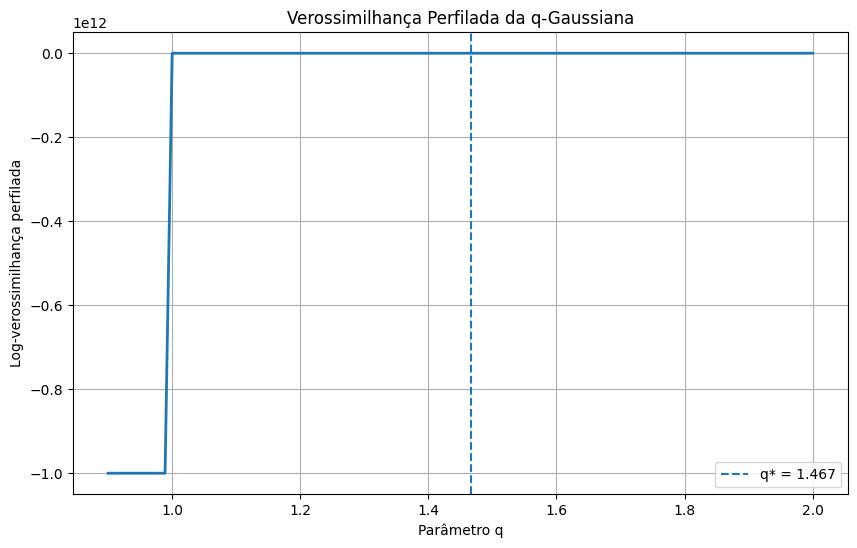

In [185]:
q_grid = np.linspace(0.9, 2, 100)

q_vals, loglik_vals, mle_params = profile_loglik_q(data['Rentability'], q_grid)


plt.figure(figsize=(10, 6))
plt.plot(q_vals, loglik_vals, linewidth=2)
plt.xlabel('Parâmetro q')
plt.ylabel('Log-verossimilhança perfilada')
plt.title('Verossimilhança Perfilada da q-Gaussiana')
plt.grid(True)

# marcar o máximo
q_hat = q_vals[np.nanargmax(loglik_vals)]
ll_max = np.nanmax(loglik_vals)
plt.axvline(q_hat, linestyle='--', label=f'q* = {q_hat:.3f}')
plt.legend()

plt.show()


#### q-Gaussiana ajustada

In [ ]:
idx_max = np.argmax(loglik_vals)
q_star = q_vals[idx_max]

best_params = mle_params[idx_max]

q_star = best_params['q']
mu_star = best_params['mu']
beta_star = best_params['beta']

print(f"Estimativa MLE:")
print(f"q   = {q_star:.4f}")
print(f"mu  = {mu_star:.6f}")
print(f"beta= {beta_star:.6e}")


In [193]:
def q_gaussian_pdf(xs, mu, beta, q):
    xs = np.asarray(xs)

    # termo interno
    arg = 1 - (1 - q) * beta * (xs - mu)**2

    # zera fora do suporte (necessário para q < 1)
    arg = np.maximum(arg, 0.0)

    # parte não normalizada
    power = 1.0 / (1.0 - q)
    f_unnorm = arg**power

    # constante de normalização
    Z = Z_numeric(mu, beta, q)
    if Z <= 0 or not np.isfinite(Z):
        return np.zeros_like(xs)

    Aq = 1.0 / Z
    return Aq * f_unnorm


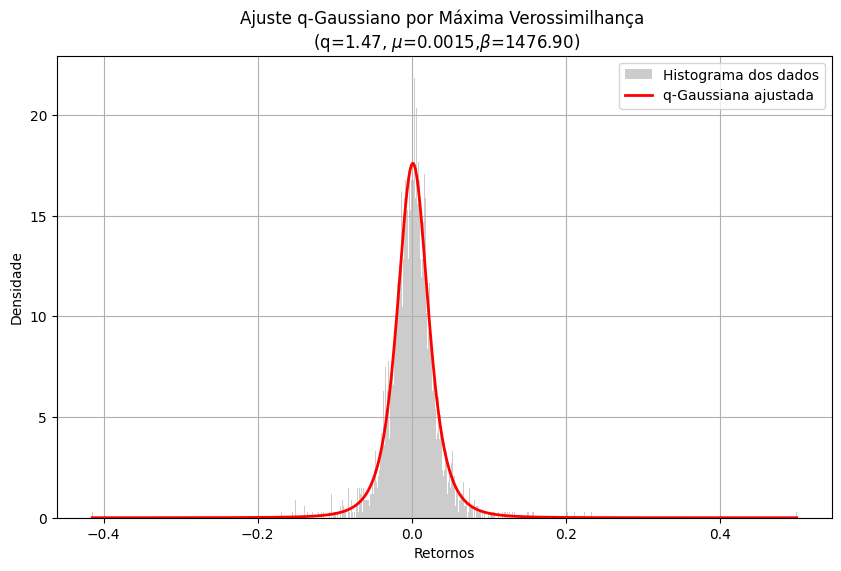

In [202]:
x_data = returns.values
xs = np.linspace(x_data.min(), x_data.max(), 500)

pdf_q = q_gaussian_pdf(xs, mu_star, beta_star, q_star)

plt.figure(figsize=(10, 6))

plt.hist(x_data, bins=1000, density=True,
         alpha=0.4, color='gray', label='Histograma dos dados')

plt.plot(xs, pdf_q, 'r-', lw=2,
         label='q-Gaussiana ajustada')

plt.xlabel('Retornos')
plt.ylabel('Densidade')
plt.title(f'Ajuste q-Gaussiano por Máxima Verossimilhança \n (q={q_star:.2f}, $\\mu$={mu_star:.4f},$\\beta$={beta_star:.2f}) ')
plt.grid(True)
plt.legend()
plt.show()
